In [204]:
%cd "F:\University\Master's Thesis\Datasets\rnd"

F:\University\Master's Thesis\Datasets\rnd


In [261]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import svm, ensemble, neural_network, naive_bayes, neighbors
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [264]:
import copy
from pathlib import Path
import matplotlib.pyplot as plt 

# List of columns you want to read
file_path = 'Combined Final Dataset.csv'
df = pd.read_csv(file_path)
df.head(-1)

,Unnamed: 0,Time,exported_service,host,instance,method,namespace,path,status,Value,service_method_status,CPU,Memory
0,0,2024-04-19 22:06:00,order-management-srv,microservices-bookstore.dev,10.1.10.31:10254,GET,ingress-nginx,/api/orders/.*,200,5,order-management-srv_GET_200,0.546,0.751
1,1,2024-04-19 22:06:00,payment-processing-srv,microservices-bookstore.dev,10.1.10.31:10254,GET,ingress-nginx,/api/payments/.*,401,1,payment-processing-srv_GET_401,0.546,0.751
2,2,2024-04-19 22:06:00,product-catalog-srv,microservices-bookstore.dev,10.1.10.31:10254,GET,ingress-nginx,/api/products/.*,200,9,product-catalog-srv_GET_200,0.546,0.751
3,3,2024-04-19 22:06:00,review-and-rating-srv,microservices-bookstore.dev,10.1.10.31:10254,POST,ingress-nginx,/api/reviews/.*,401,1,review-and-rating-srv_POST_401,0.546,0.751
4,4,2024-04-19 22:06:00,user-account-srv,microservices-bookstore.dev,10.1.10.31:10254,POST,ingress-nginx,/api/users/.*,200,3,user-account-srv_POST_200,0.546,0.751
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102647,102647,2024-04-23 16:57:00,review-and-rating-srv,microservices-bookstore.dev,10.1.12.84:10254,PUT,ingress-nginx,/api/reviews/.*,200,4474,review-and-rating-srv_PUT_200,0.388,0.783
102648,102648,2024-04-23 16:57:00,review-and-rating-srv,microservices-bookstore.dev,10.1.12.84:10254,PUT,ingress-nginx,/api/reviews/.*,500,23,review-and-rating-srv_PUT_500,0.388,0.783
102649,102649,2024-04-23 16:57:00,shipping-and-logistics-srv,microservices-bookstore.dev,10.1.12.84:10254,GET,ingress-nginx,/api/shipping/.*,200,4601,shipping-and-logistics-srv_GET_200,0.388,0.783
102650,102650,2024-04-23 16:57:00,user-account-srv,microservices-bookstore.dev,10.1.12.84:10254,GET,ingress-nginx,/api/users/.*,200,4458,user-account-srv_GET_200,0.388,0.783


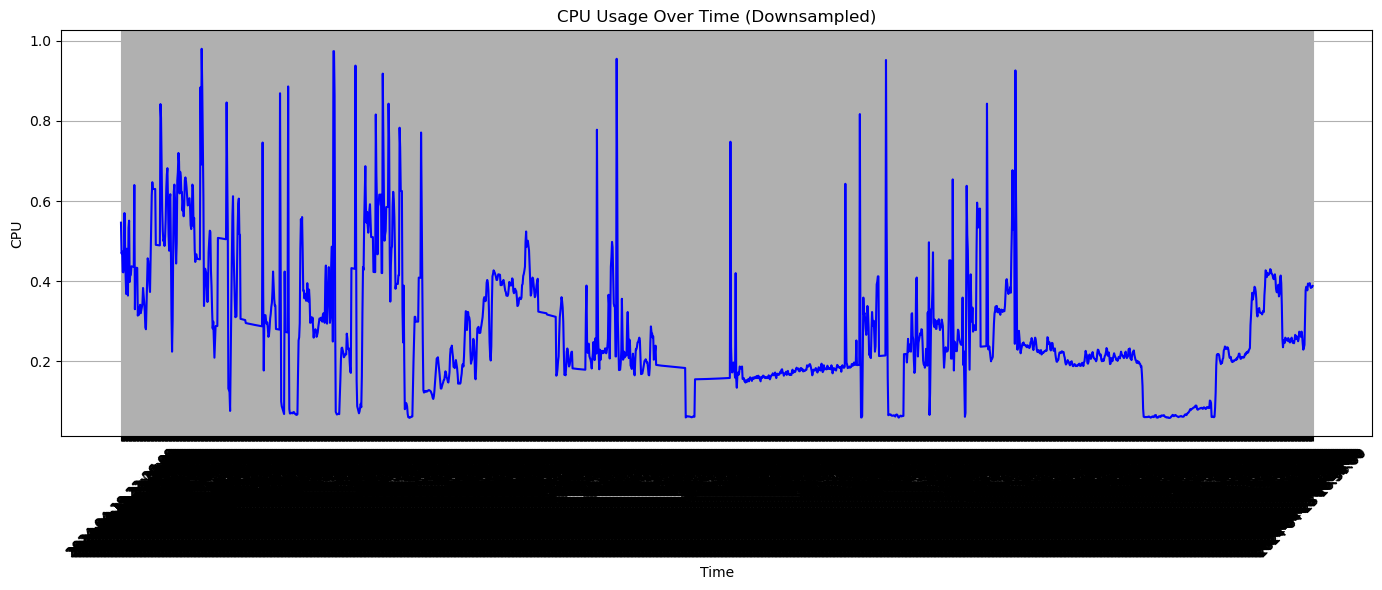

In [268]:
import matplotlib.pyplot as plt

# Downsample the DataFrame to reduce the number of data points
downsampled_df = df[::50]  # Select every 10th row

# Plot Time against CPU with downsampled data
plt.figure(figsize=(14, 6))
plt.plot(downsampled_df['Time'], downsampled_df['CPU'], color='blue', linestyle='-')
plt.title('CPU Usage Over Time (Downsampled)')
plt.xlabel('Time')
plt.ylabel('CPU')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [269]:
# Function to classify failures based on CPU and Memory values
def classify_failure(row):
    memory_usage = row['Memory']
    cpu_usage = row['CPU']

    if memory_usage < 0.85 and cpu_usage < 0.1:
        return "Idle or Low-Traffic"
    elif memory_usage < 0.75 and 0.1 <= cpu_usage <= 0.48:
        return "Normal Operation"
    elif memory_usage < 0.75 and cpu_usage > 0.48:
        return "Processing Intensive Operation"
    elif 0.75 <= memory_usage <= 0.75 and cpu_usage < 0.1:
        return "Normal Operation"
    elif 0.75 <= memory_usage <= 0.75 and 0.1 <= cpu_usage <= 0.48:
        return "Normal Operation"
    elif 0.75 <= memory_usage <= 0.75 and cpu_usage > 0.48:
        return "Processing Intensive Operation"
    elif memory_usage > 0.75 and cpu_usage < 0.1:
        return "Potential Memory Leak"
    elif memory_usage > 0.75 and 0.1 <= cpu_usage <= 0.48:
        return "Memory-Intensive Operation"
    elif memory_usage > 0.75 and cpu_usage > 0.48:
        return "Resource-Intensive Operation"
    else:
        return "Unknown State"

# Apply the function to create the 'Failure Classification' column
df['Failure Classification'] = df.apply(classify_failure, axis=1)

# Display the updated DataFrame
df.head(-1)

,Unnamed: 0,Time,exported_service,host,instance,method,namespace,path,status,Value,service_method_status,CPU,Memory,Failure Classification
0,0,2024-04-19 22:06:00,order-management-srv,microservices-bookstore.dev,10.1.10.31:10254,GET,ingress-nginx,/api/orders/.*,200,5,order-management-srv_GET_200,0.546,0.751,Resource-Intensive Operation
1,1,2024-04-19 22:06:00,payment-processing-srv,microservices-bookstore.dev,10.1.10.31:10254,GET,ingress-nginx,/api/payments/.*,401,1,payment-processing-srv_GET_401,0.546,0.751,Resource-Intensive Operation
2,2,2024-04-19 22:06:00,product-catalog-srv,microservices-bookstore.dev,10.1.10.31:10254,GET,ingress-nginx,/api/products/.*,200,9,product-catalog-srv_GET_200,0.546,0.751,Resource-Intensive Operation
3,3,2024-04-19 22:06:00,review-and-rating-srv,microservices-bookstore.dev,10.1.10.31:10254,POST,ingress-nginx,/api/reviews/.*,401,1,review-and-rating-srv_POST_401,0.546,0.751,Resource-Intensive Operation
4,4,2024-04-19 22:06:00,user-account-srv,microservices-bookstore.dev,10.1.10.31:10254,POST,ingress-nginx,/api/users/.*,200,3,user-account-srv_POST_200,0.546,0.751,Resource-Intensive Operation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102647,102647,2024-04-23 16:57:00,review-and-rating-srv,microservices-bookstore.dev,10.1.12.84:10254,PUT,ingress-nginx,/api/reviews/.*,200,4474,review-and-rating-srv_PUT_200,0.388,0.783,Memory-Intensive Operation
102648,102648,2024-04-23 16:57:00,review-and-rating-srv,microservices-bookstore.dev,10.1.12.84:10254,PUT,ingress-nginx,/api/reviews/.*,500,23,review-and-rating-srv_PUT_500,0.388,0.783,Memory-Intensive Operation
102649,102649,2024-04-23 16:57:00,shipping-and-logistics-srv,microservices-bookstore.dev,10.1.12.84:10254,GET,ingress-nginx,/api/shipping/.*,200,4601,shipping-and-logistics-srv_GET_200,0.388,0.783,Memory-Intensive Operation
102650,102650,2024-04-23 16:57:00,user-account-srv,microservices-bookstore.dev,10.1.12.84:10254,GET,ingress-nginx,/api/users/.*,200,4458,user-account-srv_GET_200,0.388,0.783,Memory-Intensive Operation


In [270]:
# Find unique values of Failure Classification column and their frequency of occurrence
unique_values_counts = df['Failure Classification'].value_counts()

# Print unique values and their frequencies
print("Unique Values of Failure Classification and Their Frequencies:")
print(unique_values_counts)

Unique Values of Failure Classification and Their Frequencies:
Normal Operation                  52628
Memory-Intensive Operation        28403
Idle or Low-Traffic               11179
Resource-Intensive Operation       5752
Processing Intensive Operation     4691
Name: Failure Classification, dtype: int64


In [257]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier

# Encode the Failure Classification labels
label_encoder = LabelEncoder()
# df['Failure Classification Encoded'] = label_encoder.fit_transform(df['Failure Classification'])

# Assuming df is your final aggregated dataset

# Prepare features (CPU, Memory) and failure classification labels
X = df.drop(columns=['Unnamed: 0', 'Time', 'CPU', 'Memory', 'Failure Classification'])
y = df[['Failure Classification']]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


mlp_classifier = MLPClassifier(hidden_layer_sizes=(128, 64, 64, 52), activation='relu', solver='adam', max_iter=1000, random_state=42)
mlp_classifier.fit(X_train, y_train.values.ravel())

# Evaluate the model
y_pred = mlp_classifier.predict(X_test)
print(classification_report(y_test, y_pred))

                                precision    recall  f1-score   support

           Idle or Low-Traffic       0.60      0.13      0.22      1092
    Memory-Intensive Operation       0.45      0.67      0.54      2504
              Normal Operation       0.55      0.57      0.56      2823
Processing Intensive Operation       0.00      0.00      0.00       255
  Resource-Intensive Operation       0.33      0.04      0.07       284

                      accuracy                           0.50      6958
                     macro avg       0.39      0.28      0.28      6958
                  weighted avg       0.49      0.50      0.46      6958



In [260]:
import numpy as np

# Choose a random sample index from the test set
random_index = np.random.randint(len(X_test))

# Get the random sample features from the test set
random_sample_features = X_test.iloc[random_index]

# Reshape the features to match the input format expected by the model
random_sample_features = random_sample_features.values.reshape(1, -1)

# Perform prediction on the random sample
predicted_label_encoded = mlp_classifier.predict(random_sample_features)

# Decode the predicted label
predicted_label = predicted_label_encoded

# print("Random Sample Features:")
# print(X_test.iloc[random_index])
# print("\nPredicted Failure Classification Label:", predicted_label[0])

# Perform prediction on the random sample
predicted_proba = mlp_classifier.predict_proba(random_sample_features)

print("Random Sample Features:")
print(X_test.iloc[random_index])
print("\nPredicted Failure Classification Label:", predicted_label[0])
print("\nProbability Distribution for Each Class:")
for label, prob in zip(mlp_classifier.classes_, predicted_proba[0]):
    print(f"{label}: {prob:.4f}")

Random Sample Features:
order-management-srv_GET_500          0.0
order-management-srv_GET_502          0.0
order-management-srv_GET_503          0.0
order-management-srv_GET_504          0.0
order-management-srv_POST_500         0.0
order-management-srv_POST_502         1.0
order-management-srv_POST_503         0.0
order-management-srv_POST_504         0.0
order-management-srv_PUT_500          0.0
order-management-srv_PUT_502          0.0
order-management-srv_PUT_503          0.0
order-management-srv_PUT_504          0.0
payment-processing-srv_GET_500        0.0
payment-processing-srv_GET_502        0.0
payment-processing-srv_PUT_500        0.0
payment-processing-srv_PUT_502        0.0
product-catalog-srv_GET_500           0.0
product-catalog-srv_GET_502           0.0
product-catalog-srv_GET_504           0.0
product-catalog-srv_POST_500          0.0
product-catalog-srv_POST_502          1.0
product-catalog-srv_POST_504          0.0
product-catalog-srv_PUT_500           0.0
product-ca

F:\Software\Anaconda\envs\deeplearning-env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
F:\Software\Anaconda\envs\deeplearning-env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


In [256]:
# Train the RandomForestClassifier model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Scale feature importances to [0, 1] range
scaled_importances = (feature_importances - np.min(feature_importances)) / (np.max(feature_importances) - np.min(feature_importances))

# Associate each importance score with its corresponding feature name
feature_names = X_train.columns

# Normalize importance scores to sum up to 1
normalized_importances = scaled_importances / np.sum(scaled_importances)

# Select a random sample from the test data
random_index = np.random.randint(len(X_test))
random_sample_features = X_test.iloc[random_index]

# Find the feature with the highest importance
highest_importance_index = np.argmax(normalized_importances)
highest_importance_feature = feature_names[highest_importance_index]

# Display the normalized importance scores for each input feature
for feature_name, importance in zip(feature_names, normalized_importances):
    print(f"Feature: {feature_name}, Importance: {importance}")

# Display the highest importance feature
print(f"\nFeature with highest importance: {highest_importance_feature}")

# Display the random sample features
print("\nRandom Sample Features:")
print(random_sample_features)

F:\Software\Anaconda\envs\deeplearning-env\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Feature: order-management-srv_GET_500, Importance: 0.006420710017430113
Feature: order-management-srv_GET_502, Importance: 0.006068313603912494
Feature: order-management-srv_GET_503, Importance: 0.0036931817094108484
Feature: order-management-srv_GET_504, Importance: 0.07735793520046799
Feature: order-management-srv_POST_500, Importance: 0.006375846185338967
Feature: order-management-srv_POST_502, Importance: 0.06839138027436971
Feature: order-management-srv_POST_503, Importance: 0.0013996170467023576
Feature: order-management-srv_POST_504, Importance: 0.017456710931336966
Feature: order-management-srv_PUT_500, Importance: 0.015287837833211235
Feature: order-management-srv_PUT_502, Importance: 0.0069828638112128675
Feature: order-management-srv_PUT_503, Importance: 0.004321117624511065
Feature: order-management-srv_PUT_504, Importance: 0.01770218147758648
Feature: payment-processing-srv_GET_500, Importance: 0.0023003688558859195
Feature: payment-processing-srv_GET_502, Importance: 0.00

In [ ]:
# Create an empty list to store the highest importance feature for each record
highest_importance_features = []

# Iterate over each record in the DataFrame
for index, row in df.iterrows():
    # Get the features for the current record
    record_features = row.drop(['Unnamed: 0', 'Time', 'CPU', 'Memory', 'Failure Classification'])
    
    # Reshape the features to match the input format expected by the model
    record_features_reshaped = record_features.values.reshape(1, -1)
    
    # Predict the label for the current record
    predicted_label_encoded = rf_model.predict(record_features_reshaped)
    
    # Decode the predicted label
    predicted_label = predicted_label_encoded[0]
    
    # Get the feature with the highest importance for the current record
    highest_importance_index = np.argmax(rf_model.feature_importances_)
    highest_importance_feature = feature_names[highest_importance_index]
    
    # Store the highest importance feature in the list
    highest_importance_features.append(highest_importance_feature)

# Add the list of highest importance features as a new column to the DataFrame
df['Failure Source'] = highest_importance_features

F:\Software\Anaconda\envs\deeplearning-env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
F:\Software\Anaconda\envs\deeplearning-env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
F:\Software\Anaconda\envs\deeplearning-env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
F:\Software\Anaconda\envs\deeplearning-env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
F:\Software\Anaconda\envs\deeplearning-env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with f

In [198]:
df.head(-1)

,Unnamed: 0,order-management-srv_GET_200,order-management-srv_GET_500,order-management-srv_GET_502,order-management-srv_GET_503,order-management-srv_GET_504,order-management-srv_POST_201,order-management-srv_POST_500,order-management-srv_POST_502,order-management-srv_POST_503,...,user-account-srv_GET_200,user-account-srv_GET_502,user-account-srv_POST_200,user-account-srv_POST_500,user-account-srv_POST_502,Time,CPU,Memory,Failure Classification,Failure Source
0,0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,1.0,0.0,1.0,2024-04-19 16:22:00,0.9800,0.898,Resource-Intensive Operation,review-and-rating-srv_PUT_500
1,1,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,1.0,0.0,1.0,2024-04-19 16:23:00,0.8850,0.571,Processing Intensive Operation,review-and-rating-srv_PUT_500
2,2,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,1.0,0.0,1.0,2024-04-19 16:24:00,0.7400,0.706,Processing Intensive Operation,review-and-rating-srv_PUT_500
3,3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,1.0,0.0,1.0,2024-04-19 16:25:00,0.6090,0.771,Resource-Intensive Operation,review-and-rating-srv_PUT_500
4,4,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,1.0,0.0,1.0,2024-04-19 16:26:00,0.4470,0.809,Memory-Intensive Operation,review-and-rating-srv_PUT_500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34780,34780,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,2024-05-13 20:02:00,0.0607,0.663,Normal Operation,review-and-rating-srv_PUT_500
34781,34781,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,2024-05-13 20:03:00,0.0611,0.661,Normal Operation,review-and-rating-srv_PUT_500
34782,34782,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,2024-05-13 20:04:00,0.0607,0.660,Normal Operation,review-and-rating-srv_PUT_500
34783,34783,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,2024-05-13 20:05:00,0.0614,0.660,Normal Operation,review-and-rating-srv_PUT_500


In [271]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import svm, ensemble, neural_network, naive_bayes, neighbors

# Assuming df is your pandas DataFrame
# Split the data into features (X) and target label (y)
X = df[['Memory', 'CPU']]

# Encode the categorical target variable using OneHotEncoder
encoder = OneHotEncoder(sparse=False)
y_encoded = encoder.fit_transform(df[['exported_service']].values.reshape(-1, 1))

# Create a DataFrame with the one-hot encoded columns
y = pd.DataFrame(y_encoded, columns=encoder.get_feature_names_out(['Service Name']))

# Convert the one-hot encoded columns back to the original categorical values
y = y.idxmax(axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
rf_classifier_service = ensemble.RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_service.fit(X_train, y_train)
y_pred_rf_service = rf_classifier_service.predict(X_test)
accuracy_rf_service = accuracy_score(y_test, y_pred_rf_service)
print(f'Random Forest Service Accuracy: {accuracy_rf_service}')


# Artificial Neural Network (ANN)
mlp_classifier_service = neural_network.MLPClassifier(hidden_layer_sizes=(100,50), max_iter=500, random_state=42)
mlp_classifier_service.fit(X_train, y_train)
y_pred_mlp_service = mlp_classifier_service.predict(X_test)
accuracy_mlp_service = accuracy_score(y_test, y_pred_mlp_service)
print(f'ANN Service Accuracy: {accuracy_mlp_service}')

# Naive Bayes
nb_classifier_service = naive_bayes.GaussianNB()
nb_classifier_service.fit(X_train, y_train)
y_pred_nb_service = nb_classifier_service.predict(X_test)
accuracy_nb_service = accuracy_score(y_test, y_pred_nb_service)
print(f'Naive Bayes Service Accuracy: {accuracy_nb_service}')

# K-Nearest Neighbors (KNN)
knn_classifier_service = neighbors.KNeighborsClassifier(n_neighbors=5)
knn_classifier_service.fit(X_train, y_train)
y_pred_knn_service = knn_classifier_service.predict(X_test)
accuracy_knn_service = accuracy_score(y_test, y_pred_knn_service)
print(f'KNN Service Accuracy: {accuracy_knn_service}')

# Support Vector Machine (SVM)
svm_classifier_service = svm.SVC()
svm_classifier_service.fit(X_train, y_train)
y_pred_svm_service = svm_classifier_service.predict(X_test)
accuracy_svm_service = accuracy_score(y_test, y_pred_svm_service)
print(f'SVM Service Accuracy: {accuracy_svm_service}')


F:\Software\Anaconda\envs\deeplearning-env\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Random Forest Service Accuracy: 0.22604841459256733
ANN Service Accuracy: 0.28654230188495444
Naive Bayes Service Accuracy: 0.28269446203302323
KNN Service Accuracy: 0.21508937703959866
SVM Service Accuracy: 0.28269446203302323


In [19]:
# Save the models to disk
joblib.dump(rf_classifier_service, 'rf_classifier_service_model.joblib')
joblib.dump(mlp_classifier_service, 'mlp_classifier_service_model.joblib')
joblib.dump(nb_classifier_service, 'nb_classifier_service_model.joblib')
joblib.dump(knn_classifier_service, 'knn_classifier_service_model.joblib')
joblib.dump(svm_classifier_service, 'svm_classifier_service_model.joblib')

print("Service Name Models saved to disk.")

Service Name Models saved to disk.


In [20]:
# Load the models from disk
loaded_rf_classifier = joblib.load('rf_classifier_service_model.joblib')
loaded_mlp_classifier = joblib.load('mlp_classifier_service_model.joblib')
loaded_nb_classifier = joblib.load('nb_classifier_service_model.joblib')
loaded_knn_classifier = joblib.load('knn_classifier_service_model.joblib')
loaded_svm_classifier = joblib.load('svm_classifier_service_model.joblib')

In [21]:
# Random Forrest
y_pred_rf_service = loaded_rf_classifier.predict(X_test)
accuracy_rf_service = accuracy_score(y_test, y_pred_rf_service)
print(f'Random Forest Service Accuracy: {accuracy_rf_service}')


# Artificial Neural Network (ANN)
y_pred_mlp_service = loaded_mlp_classifier.predict(X_test)
accuracy_mlp_service = accuracy_score(y_test, y_pred_mlp_service)
print(f'ANN Service Accuracy: {accuracy_mlp_service}')

# Naive Bayes
y_pred_nb_service = loaded_nb_classifier.predict(X_test)
accuracy_nb_service = accuracy_score(y_test, y_pred_nb_service)
print(f'Naive Bayes Service Accuracy: {accuracy_nb_service}')

# K-Nearest Neighbors (KNN)
y_pred_knn_service = loaded_knn_classifier.predict(X_test)
accuracy_knn_service = accuracy_score(y_test, y_pred_knn_service)
print(f'KNN Service Accuracy: {accuracy_knn_service}')

# Support Vector Machine (SVM)
y_pred_svm_service = loaded_svm_classifier.predict(X_test)
accuracy_svm_service = accuracy_score(y_test, y_pred_svm_service)
print(f'SVM Service Accuracy: {accuracy_svm_service}')

Random Forest Service Accuracy: 0.7558776773761714
ANN Service Accuracy: 0.7530538821954484
Naive Bayes Service Accuracy: 0.717411311914324
KNN Service Accuracy: 0.7560240963855421
SVM Service Accuracy: 0.7527819611780455


In [272]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import svm, ensemble, neural_network, naive_bayes, neighbors

# Assuming df is your pandas DataFrame
# Split the data into features (X) and target label (y)
X = df[['Memory', 'CPU']]

# Encode the categorical target variable using OneHotEncoder
encoder_method = OneHotEncoder(sparse=False)
y_encoded_method = encoder_method.fit_transform(df[['method']].values.reshape(-1, 1))

# Create a DataFrame with the one-hot encoded columns
y_method = pd.DataFrame(y_encoded_method, columns=encoder_method.get_feature_names_out(['Method']))

# Convert the one-hot encoded columns back to the original categorical values
y_method = y_method.idxmax(axis=1)

# Split the data into training and testing sets
X_train_method, X_test_method, y_train_method, y_test_method = train_test_split(X, y_method, test_size=0.2, random_state=42)

# Random Forest
rf_classifier_method = ensemble.RandomForestClassifier(n_estimators=300, random_state=42)
rf_classifier_method.fit(X_train_method, y_train_method)
y_pred_rf_method = rf_classifier_method.predict(X_test_method)
accuracy_rf_method = accuracy_score(y_test_method, y_pred_rf_method)
print(f'Random Forest HTTP Method Accuracy: {accuracy_rf_method}')


# Artificial Neural Network (ANN)
mlp_classifier_method = neural_network.MLPClassifier(hidden_layer_sizes=(100,50), max_iter=500, random_state=42)
mlp_classifier_method.fit(X_train_method, y_train_method)
y_pred_mlp_method = mlp_classifier_method.predict(X_test_method)
accuracy_mlp_method = accuracy_score(y_test_method, y_pred_mlp_method)
print(f'ANN HTTP Method Accuracy: {accuracy_mlp_method}')

# Naive Bayes
nb_classifier_method = naive_bayes.GaussianNB()
nb_classifier_method.fit(X_train_method, y_train_method)
y_pred_nb_method = nb_classifier_method.predict(X_test_method)
accuracy_nb_method = accuracy_score(y_test_method, y_pred_nb_method)
print(f'Naive Bayes HTTP Method Accuracy: {accuracy_nb_method}')

# K-Nearest Neighbors (KNN)
knn_classifier_method = neighbors.KNeighborsClassifier(n_neighbors=5)
knn_classifier_method.fit(X_train_method, y_train_method)
y_pred_knn_method = knn_classifier_method.predict(X_test_method)
accuracy_knn_method = accuracy_score(y_test_method, y_pred_knn_method)
print(f'KNN HTTP Method Accuracy: {accuracy_knn_method}')

# Support Vector Machine (SVM)
svm_classifier_method = svm.SVC()
svm_classifier_method.fit(X_train_method, y_train_method)
y_pred_svm_method = svm_classifier_method.predict(X_test_method)
accuracy_svm_method = accuracy_score(y_test_method, y_pred_svm_method)
print(f'SVM HTTP Method Accuracy: {accuracy_svm_method}')


F:\Software\Anaconda\envs\deeplearning-env\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Random Forest HTTP Method Accuracy: 0.28917247089766696
ANN HTTP Method Accuracy: 0.39252837173055377
Naive Bayes HTTP Method Accuracy: 0.39252837173055377
KNN HTTP Method Accuracy: 0.33081681359894793
SVM HTTP Method Accuracy: 0.39252837173055377


In [23]:
# Save the models to disk
joblib.dump(rf_classifier_method, 'rf_classifier_method_model.joblib')
joblib.dump(mlp_classifier_method, 'mlp_classifier_method_model.joblib')
joblib.dump(nb_classifier_method, 'nb_classifier_method_model.joblib')
joblib.dump(knn_classifier_method, 'knn_classifier_method_model.joblib')
joblib.dump(svm_classifier_method, 'svm_classifier_method_model.joblib')

print("Method Models saved to disk.")

Method Models saved to disk.


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import svm, ensemble, neural_network, naive_bayes, neighbors

# Assuming df is your pandas DataFrame
# Split the data into features (X) and target label (y)
X = df[['Memory', 'CPU']]

# Encode the categorical target variable using OneHotEncoder
encoder_status = OneHotEncoder(sparse=False)
y_encoded_status = encoder_status.fit_transform(df[['status']].values.reshape(-1, 1))

# Create a DataFrame with the one-hot encoded columns
y_status = pd.DataFrame(y_encoded_status, columns=encoder_status.get_feature_names_out(['status']))

# Convert the one-hot encoded columns back to the original categorical values
y_status = y_status.idxmax(axis=1)

# Split the data into training and testing sets
X_train_status, X_test_status, y_train_status, y_test_status = train_test_split(X, y_status, test_size=0.2, random_state=42)

# Random Forest
rf_classifier_status = ensemble.RandomForestClassifier(n_estimators=300, random_state=42)
rf_classifier_status.fit(X_train_status, y_train_status)
y_pred_rf_status = rf_classifier_status.predict(X_test_status)
accuracy_rf_status = accuracy_score(y_test_status, y_pred_rf_status)
print(f'Random Forest HTTP Status Accuracy: {accuracy_rf_status}')


# Artificial Neural Network (ANN)
mlp_classifier_status = neural_network.MLPClassifier(hidden_layer_sizes=(100,50), max_iter=500, random_state=42)
mlp_classifier_status.fit(X_train_status, y_train_status)
y_pred_mlp_status = mlp_classifier_status.predict(X_test_status)
accuracy_mlp_status = accuracy_score(y_test_status, y_pred_mlp_status)
print(f'ANN HTTP Status Accuracy: {accuracy_mlp_status}')

# Naive Bayes
nb_classifier_status = naive_bayes.GaussianNB()
nb_classifier_status.fit(X_train_status, y_train_status)
y_pred_nb_status = nb_classifier_status.predict(X_test_status)
accuracy_nb_status = accuracy_score(y_test_status, y_pred_nb_status)
print(f'Naive Bayes HTTP Status Accuracy: {accuracy_nb_status}')

# K-Nearest Neighbors (KNN)
knn_classifier_status = neighbors.KNeighborsClassifier(n_neighbors=5)
knn_classifier_status.fit(X_train_status, y_train_status)
y_pred_knn_status = knn_classifier_status.predict(X_test_status)
accuracy_knn_status = accuracy_score(y_test_status, y_pred_knn_status)
print(f'KNN HTTP Status Accuracy: {accuracy_knn_status}')

# Support Vector Machine (SVM)
svm_classifier_status = svm.SVC()
svm_classifier_status.fit(X_train_status, y_train_status)
y_pred_svm_status = svm_classifier_status.predict(X_test_status)
accuracy_svm_status = accuracy_score(y_test_status, y_pred_svm_status)
print(f'SVM HTTP Status Accuracy: {accuracy_svm_status}')

F:\Software\Anaconda\envs\deeplearning-env\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Random Forest HTTP Status Accuracy: 0.9752970214190094
ANN HTTP Status Accuracy: 0.967745983935743
Naive Bayes HTTP Status Accuracy: 0.9528949129852744
KNN HTTP Status Accuracy: 0.9769703815261044
SVM HTTP Status Accuracy: 0.9761546184738956


In [25]:
import joblib

# Save the models to disk
joblib.dump(rf_classifier_status, 'rf_classifier_status_model.joblib')
joblib.dump(mlp_classifier_status, 'mlp_classifier_status_model.joblib')
joblib.dump(nb_classifier_status, 'nb_classifier_status_model.joblib')
joblib.dump(knn_classifier_status, 'knn_classifier_status_model.joblib')
joblib.dump(svm_classifier_status, 'svm_classifier_status_model.joblib')

print("Status Models saved to disk.")

Status Models saved to disk.


In [31]:
# Testing on a model
# Given data
data = {
    'Memory usage [%]': [45.777958, 71.982993, 72.224752, 72.135143, 72.427164, 34.359488, 72.581069, 12.346585, 72.267944, 23.095423, 72.295631, 18.39634, 23.972726],
    'CPU usage [%]': [4.007266, 14.0537, 34.058797, 44.361495, 53.926062, 84.143917, 14.07761, 94.304139, 14.215333, 4.066917, 34.196585, 24.232192, 13.875389]
}

# Create DataFrame
df_testing = pd.DataFrame(data)

In [34]:
def classify_failure(row):
    memory_usage = row['Memory usage [%]']
    cpu_usage = row['CPU usage [%]']

    if memory_usage < 20 and cpu_usage < 20:
        return "Idle or Low-Traffic"
    elif memory_usage < 20 and 20 <= cpu_usage <= 70:
        return "Normal Operation"
    elif memory_usage < 20 and cpu_usage > 70:
        return "Processing Intensive Operation"
    elif 20 <= memory_usage <= 70 and cpu_usage < 20:
        return "Normal Operation"
    elif 20 <= memory_usage <= 70 and 20 <= cpu_usage <= 70:
        return "Normal Operation"
    elif 20 <= memory_usage <= 70 and cpu_usage > 70:
        return "Processing Intensive Operation"
    elif memory_usage > 70 and cpu_usage < 20:
        return "Potential Memory Leak"
    elif memory_usage > 70 and 20 <= cpu_usage <= 70:
        return "Memory-Intensive Operation"
    elif memory_usage > 70 and cpu_usage > 70:
        return "Resource-Intensive Operation"
    else:
        return "Unknown State"

# Apply the function to create the 'Failure Classification' column
df_testing['Failure Classification'] = df_testing.apply(classify_failure, axis=1)

# Display the updated DataFrame
df_testing.head(20)

,Memory usage [%],CPU usage [%],Failure Classification
0,45.777958,4.007266,Normal Operation
1,71.982993,14.053700,Potential Memory Leak
2,72.224752,34.058797,Memory-Intensive Operation
3,72.135143,44.361495,Memory-Intensive Operation
4,72.427164,53.926062,Memory-Intensive Operation
5,34.359488,84.143917,Processing Intensive Operation
6,72.581069,14.077610,Potential Memory Leak
7,12.346585,94.304139,Processing Intensive Operation
8,72.267944,14.215333,Potential Memory Leak
9,23.095423,4.066917,Normal Operation


In [37]:
loaded_rf_method_classifier = joblib.load('rf_classifier_method_model.joblib')
loaded_knn_status_classifier = joblib.load('knn_classifier_status_model.joblib')
loaded_knn_service_classifier = joblib.load('knn_classifier_service_model.joblib')

In [46]:
y_pred_method = loaded_rf_method_classifier.predict(df_testing[["Memory usage [%]", "CPU usage [%]"]])
y_pred_service = loaded_knn_service_classifier.predict(df_testing[["Memory usage [%]", "CPU usage [%]"]])
y_pred_status = loaded_knn_status_classifier.predict(df_testing[["Memory usage [%]", "CPU usage [%]"]])

In [54]:
for i in y_pred_status:
    print(i[12:])

200
429
429
429
429
503
429
503
429
200
429
200
200
